## Imports

In [471]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

Numpy version:        1.13.3
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.1.0
Scikit-Learn version: 0.19.1


In [472]:
# A function I'm defining to print out plots easier, just pass in what you want plotted
# given that it's within the x and y axis limits
def plotStuff(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # fill the space
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

# Another function like above, but with larger axes
def plotStuffAgain(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlim(-120, 120)
    ax.set_ylim(-120, 120)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # fill the space
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

# 1
Use the example matrix A and plot it's image using a few different transformations:

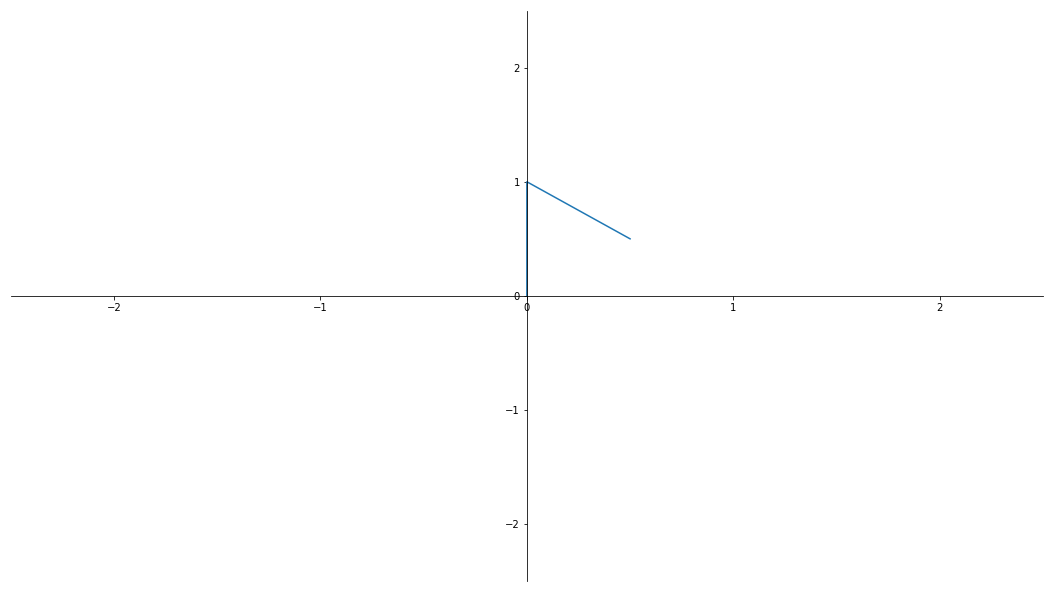

In [473]:
# Original matrix A 
A = np.matrix([[0, 0], [0, 1], [0.5, 0.5]])
plotStuff(A[:,0], A[:,1])

# 1a

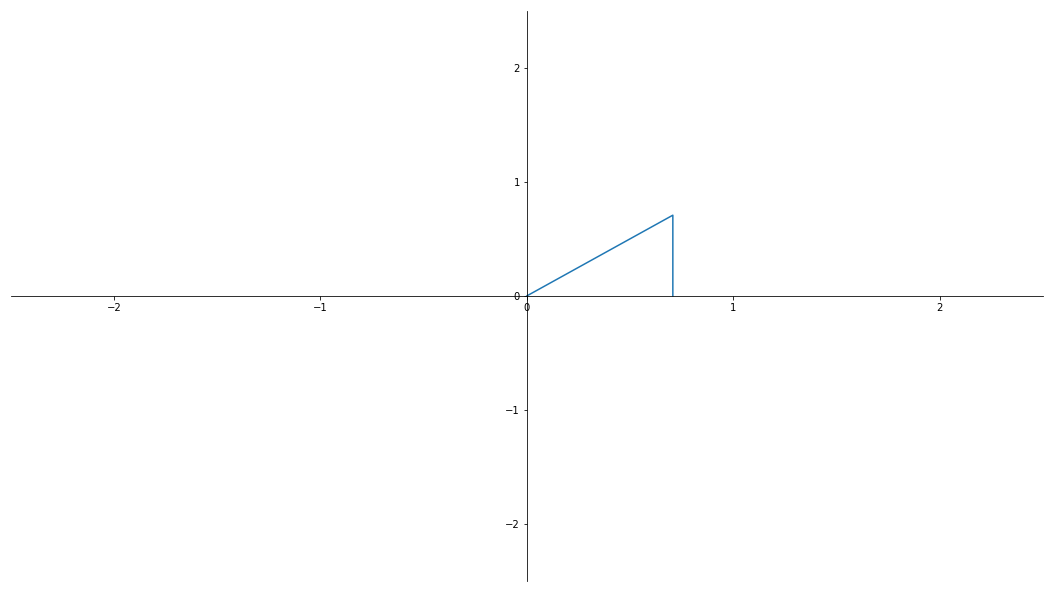

In [474]:
# Define a function that returns a rotational matrix, with parameter of degrees to rotate
def rot(a = 0):
    a = np.radians(a)
    return np.matrix([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])

# Rotate 45 degrees
plotStuff(A.dot(rot(45))[:,0], A.dot(rot(45))[:,1])

# 1b

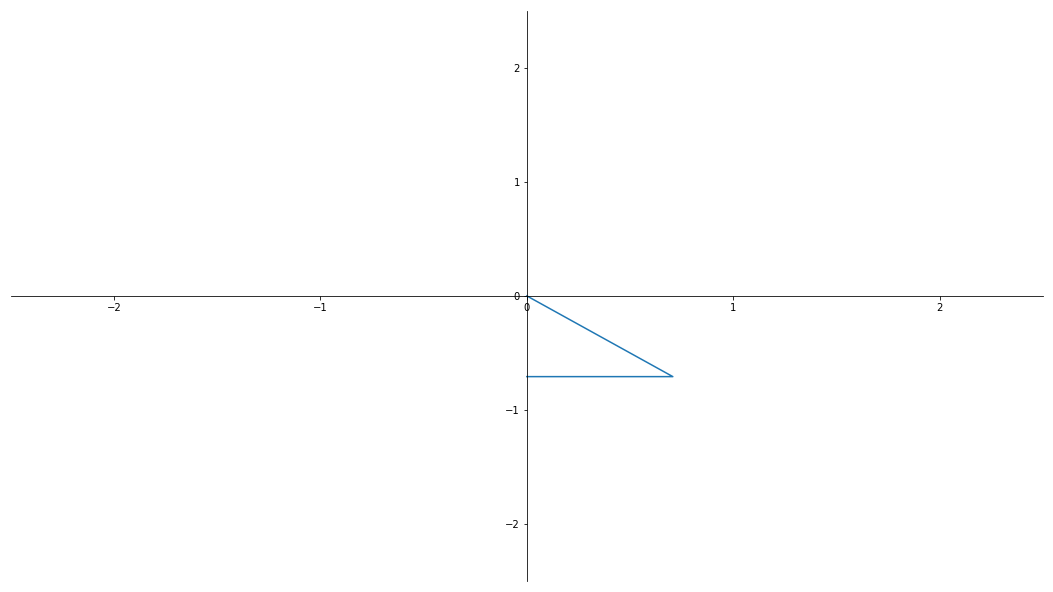

In [475]:
# Rotate -225 degrees
plotStuff(A.dot(rot(-225))[:,0], A.dot(rot(-225))[:,1])

# 1c

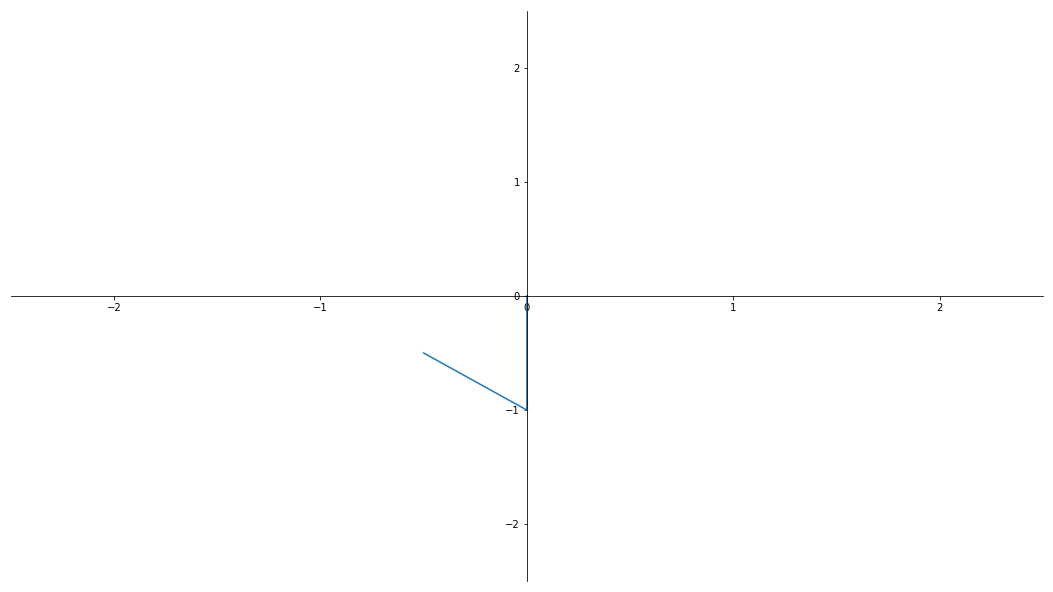

In [476]:
# Rotate 180 degrees
plotStuff(A.dot(rot(180))[:,0], A.dot(rot(180))[:,1])

# 2
Create a new simple object of your choice. The object should be asymmetric. Print this matrix.

In [477]:
# Original matrix A
B = np.matrix([[0, 0], [1, -1.5], [0.5, 1], [-0.5, 1.5], [0, 0]])
print(B)

[[ 0.   0. ]
 [ 1.  -1.5]
 [ 0.5  1. ]
 [-0.5  1.5]
 [ 0.   0. ]]


# 3
Show the object (rotation 0) and a few rotated images of that object.

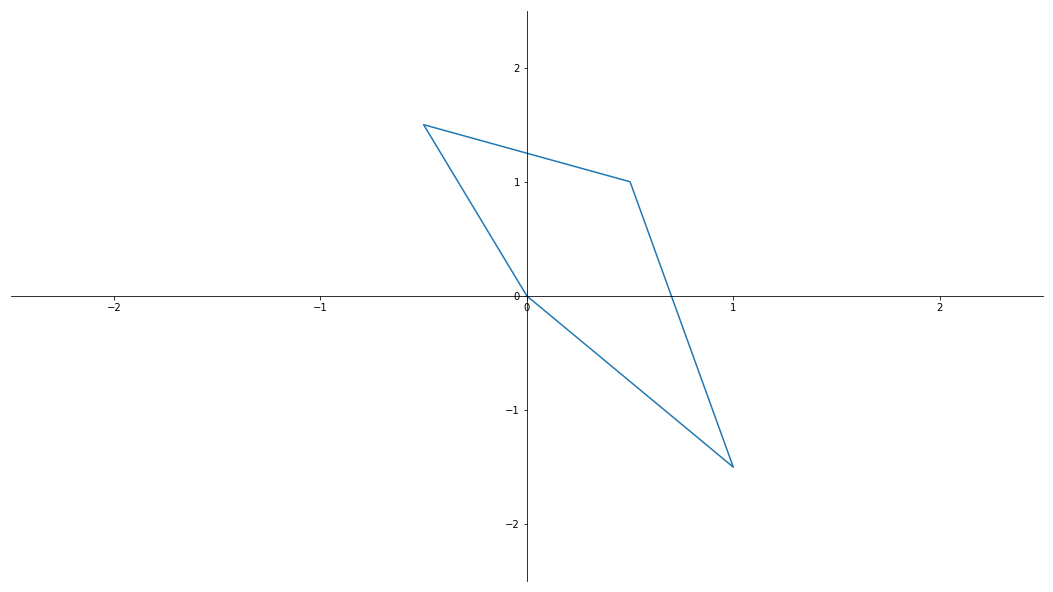

In [478]:
# Original matrix A, rotation 0
plotStuff(B.dot(rot(0))[:,0], B.dot(rot(0))[:,1])

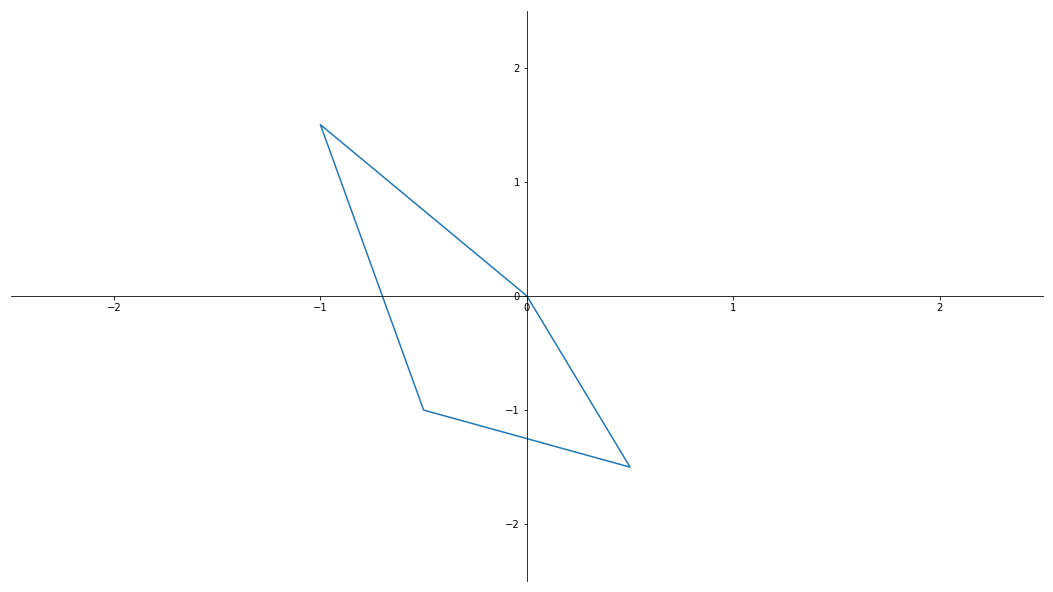

In [479]:
# Different rotations: 180 degrees
plotStuff(B.dot(rot(180))[:,0], B.dot(rot(180))[:,1])

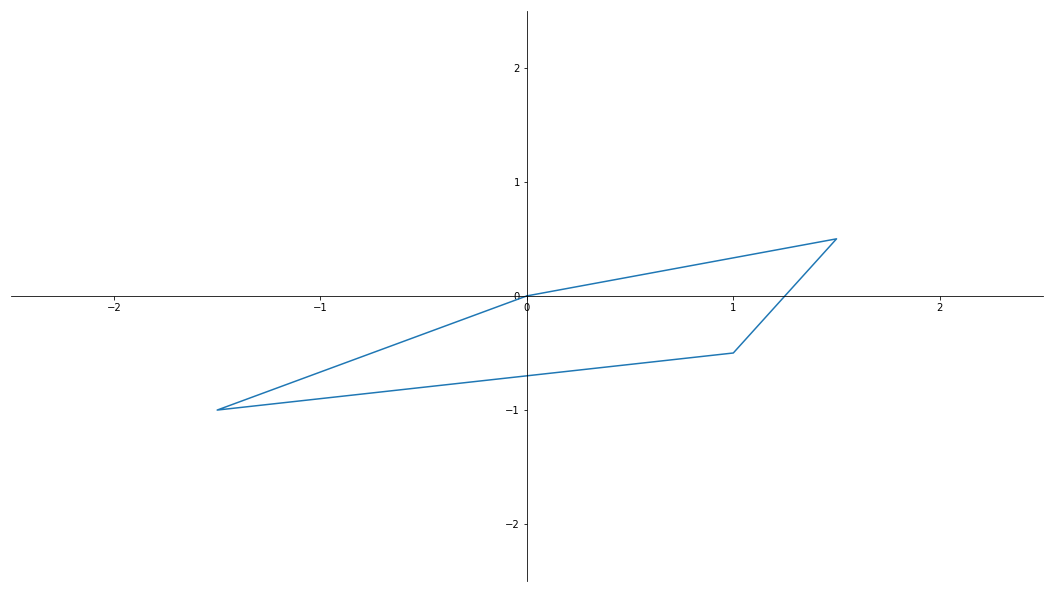

In [480]:
# Different rotations: 90 degrees
plotStuff(B.dot(rot(90))[:,0], B.dot(rot(90))[:,1])

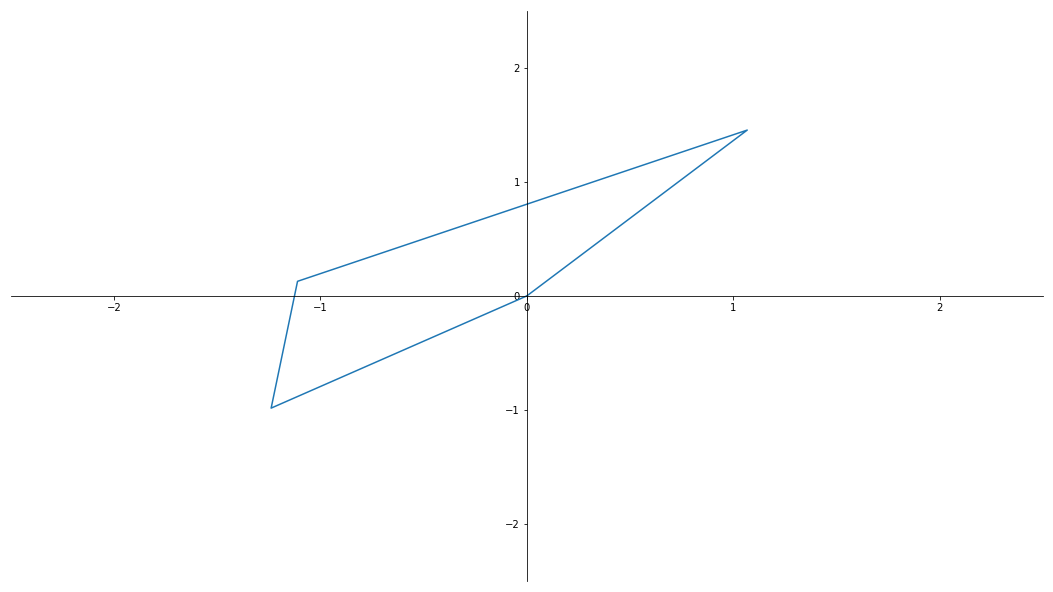

In [481]:
# Different rotations: -110 degrees
plotStuff(B.dot(rot(-110))[:,0], B.dot(rot(-110))[:,1])

# 4
Construct the flip-x matrix Fx. This matrix should mirror (flip) the x components but leave the y components untouched. Demonstrate this with your own object.

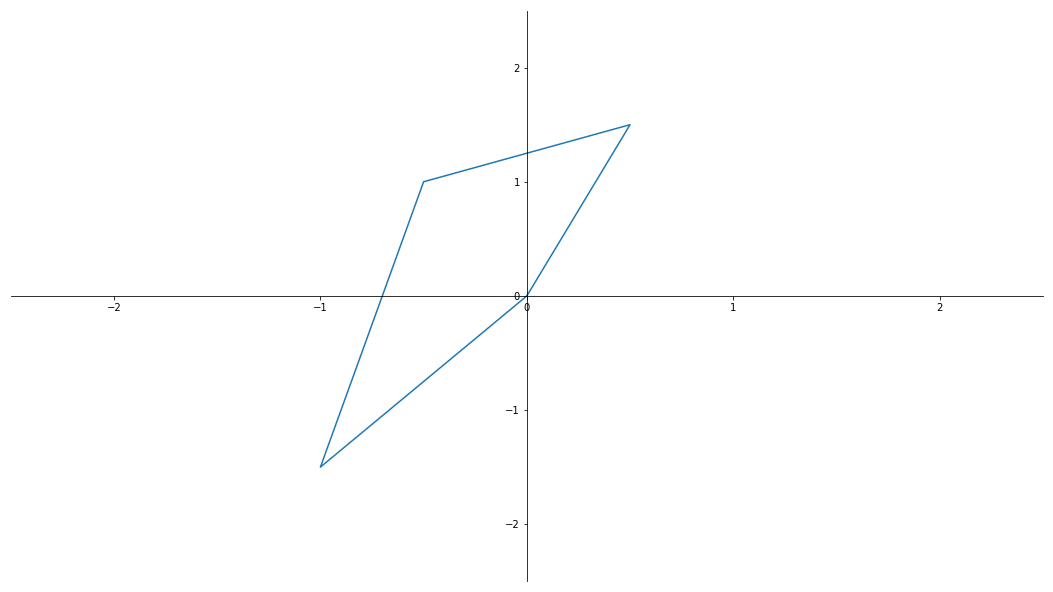

In [482]:
# Define a Flip x matrix
Fx = np.matrix([[-1, 0], [0, 1]])

plotStuff(B.dot(Fx)[:,0], B.dot(Fx)[:,1])

# 5
Create the stretch-y matrix Sy(s). This matrix should stretch (or compress) the y components by amount s while leaving x components untouched. Demonstrate it with your object.

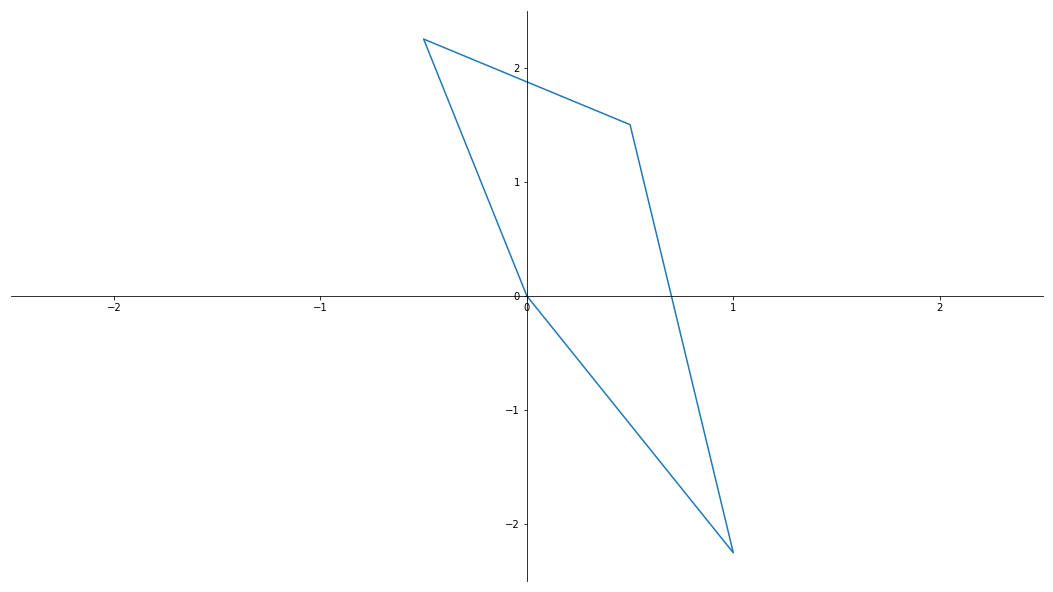

In [483]:
# Define function that return a Stretch-y matrix, with parameter s for amount
def stretchy(s = 1.0):
    return np.matrix([[1, 0], [0, s]])

# Stretch y components by 1.5 times
plotStuff(B.dot(stretchy(1.5))[:,0], B.dot(stretchy(1.5))[:,1])

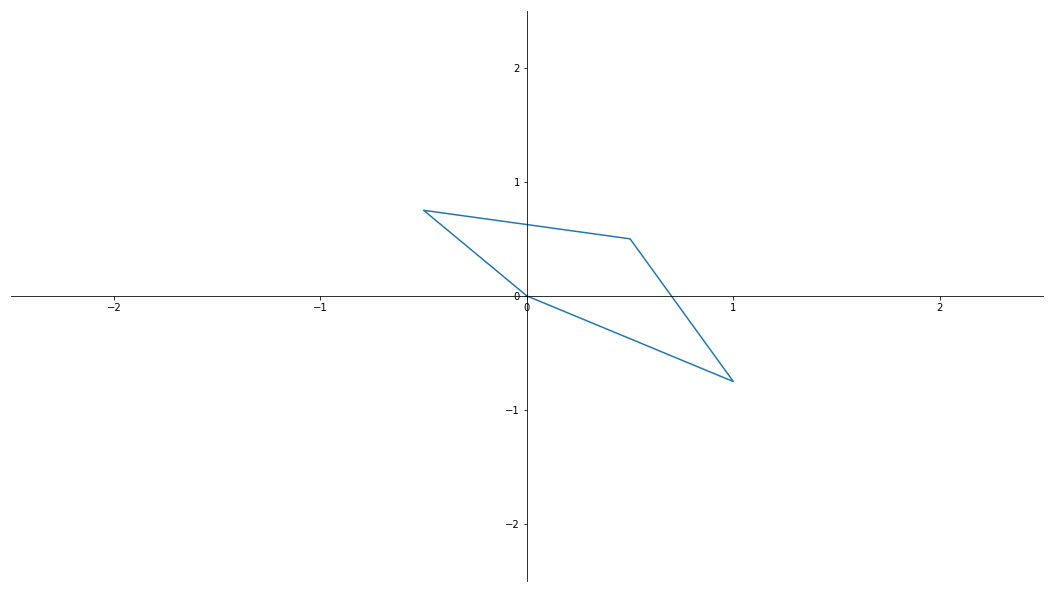

In [484]:
# Compress y components by half
plotStuff(B.dot(stretchy(0.5))[:,0], B.dot(stretchy(0.5))[:,1])

# 6
Use these transformations you created and the image provided in the file l2_image.tsv. Perform the following operation: mirror your object's image from 45-degree-line, and stretch it 2x along the 45-degree-line (see the example). Note: you may want to break the lines between different groups.

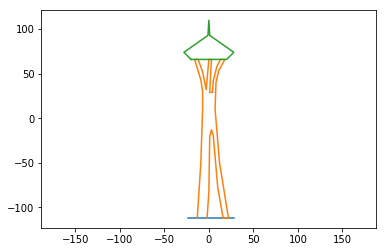

In [485]:
# Import data from file, create a DataFrame
stardata = pd.read_table('/Users/kathryn/Desktop/l2_image.tsv')
stardf = pd.DataFrame(data=stardata)

dfgp1 = stardf.query('group == 1')
dfgp2 = stardf.query('group == 2')
dfgp3 = stardf.query('group == 3')

# Change DataFrame into xy matrix
starmatrix1 = np.asmatrix(dfgp1.as_matrix(columns=['x', 'y']))
starmatrix2 = np.asmatrix(dfgp2.as_matrix(columns=['x', 'y']))
starmatrix3 = np.asmatrix(dfgp3.as_matrix(columns=['x', 'y']))

# Update aspect ratio
plt.axes().set_aspect('equal', 'datalim')

plt.plot(starmatrix1[:,0], starmatrix1[:,1])
plt.plot(starmatrix2[:,0], starmatrix2[:,1])
plt.plot(starmatrix3[:,0], starmatrix3[:,1])

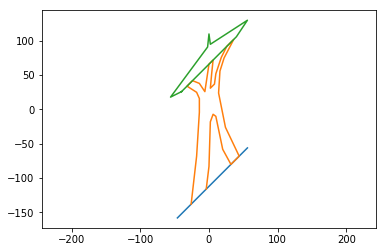

In [486]:
# Define new stretch function for along 45 degree line
# Unsure that this is correct though...
def stretch45(s=1):
    return np.matrix([[s, 2], [0, 1]])

plt.axes().set_aspect('equal', 'datalim')

plt.plot(starmatrix1.dot(stretch45(2))[:,0], starmatrix1.dot(stretch45(2))[:,1])
plt.plot(starmatrix2.dot(stretch45(2))[:,0], starmatrix2.dot(stretch45(2))[:,1])
plt.plot(starmatrix3.dot(stretch45(2))[:,0], starmatrix3.dot(stretch45(2))[:,1])

# 7
Above we discussed the transformations by right-multiplication. How can you transform the problem in a way that you can pre-multiply instead of post-multiply if you want to perform an operation? Demonstrate it with R(α).

[[ 0. ]
 [ 0. ]
 [ 0.5]]
[[ 0.   0.   0.5]]


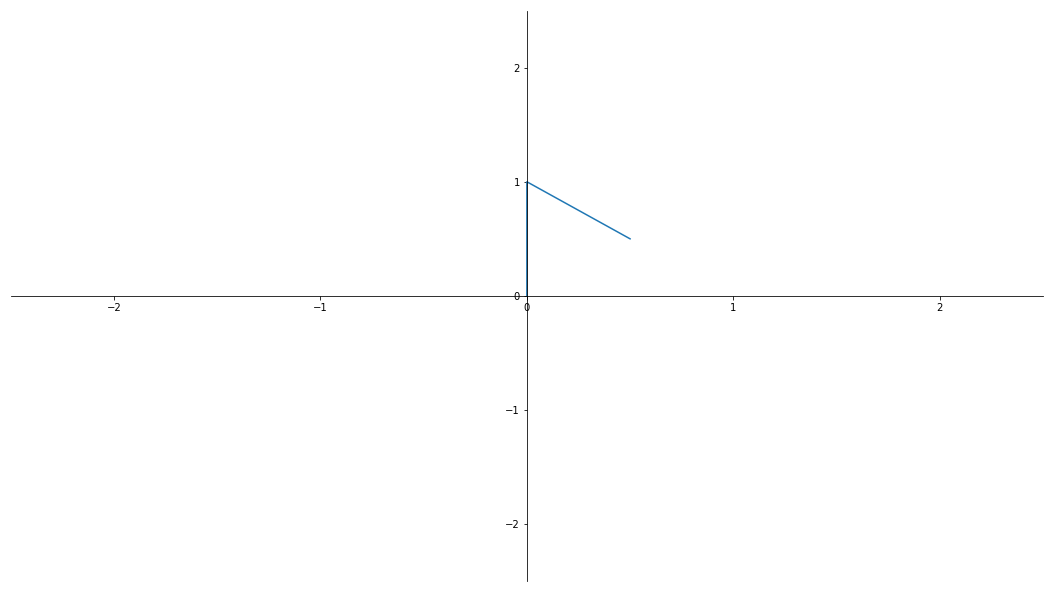

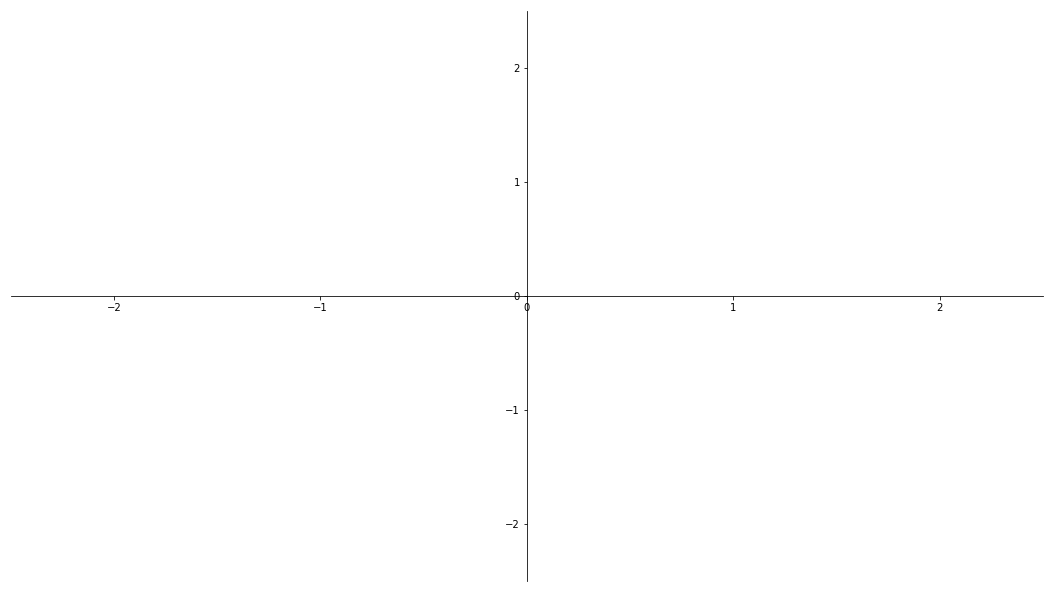

In [525]:
def rot_inverse(a = 0):
    return rot(a).T

print(A.dot(rot())[:,0])
print(rot_inverse().dot(A.T)[0,:])

plotStuff(A.dot(rot())[:,0], A.dot(rot())[:,1])
plotStuff(rot_inverse().dot(A.T)[0,:], rot_inverse().dot(A.T)[1,:])

# I don't really understand what I'm supposed to do here